In [1]:
import os
import pandas as pd
import numpy as np
import math

import matplotlib 
import matplotlib.pyplot as plt

import datetime

import scipy
from scipy import stats

## Metadata from the DLNR and important paths

In [2]:
damsite_meta = pd.read_csv('ALL_HI_reservoirs_Metadata.csv')

#Outputs Path
figures_path = os.path.join(".", "Outputs", "Figures")

## Year and Number of Reservoirs

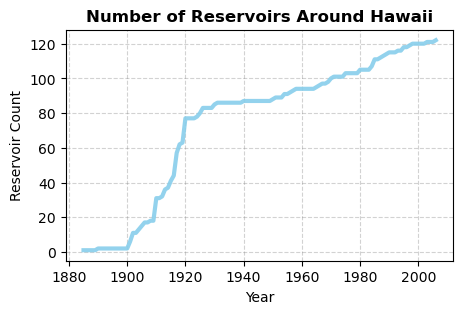

In [3]:
df = damsite_meta.copy()
df = df.sort_values(by = 'year_completed')
df = df.reset_index(drop=True)

min_yr = int(df['year_completed'].min())
max_yr = int(df['year_completed'].max())

num_res = df.groupby('year_completed').count()

res_years =  list(num_res.index)
all_years = list(range(min_yr,max_yr))

count = []
for i in all_years:
    i = float(i)
    if i in res_years:
        count.append(num_res['state_id'][i])
    else: 
        count.append(0)

accumulation = []
for i in range(len(count)):
    if i == 0:
        x = 0 + count[i]
    else:
        x = accumulation[i-1] + count[i]
    accumulation.append(x)


#creat subplot
fig, ax = plt.subplots(figsize=(5,3))

#create two plots the ',' is for used on the legend
a, = ax.plot(all_years, accumulation, linewidth = 3 ,linestyle = '-', zorder = 3, alpha = 0.9, c = 'skyblue')

#create a pretty grid
plt.rc('axes', axisbelow=True)
ax.grid(True, color='gray', linestyle='dashed', alpha = 0.35)

#set x axis to margins and y axis to 0-650


#add legend, lebels, and text
ax.set_title('Number of Reservoirs Around Hawaii', fontweight="bold")
ax.set_xlabel('Year')
ax.set_ylabel('Reservoir Count')
#ax.set_ylim(0, df_roughness_only[0]['metric_discharge_cms'].max() +100)

#save figure
plt.savefig(os.path.join(figures_path, 'Reservoir_Construction.png'))


## Piecharts

### Conditions Piechart Plot

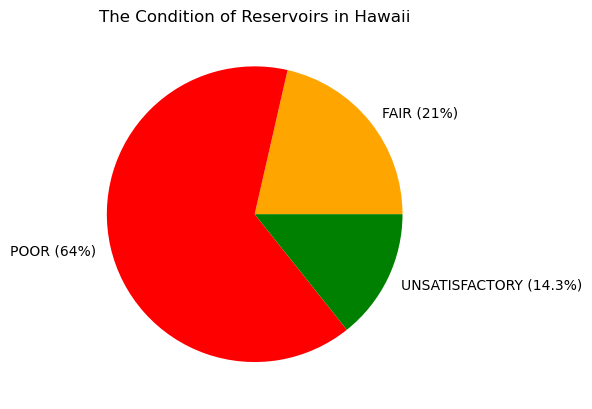

In [4]:
conditions_df = damsite_meta.groupby('ConditionAssessment').count()
conditions = conditions_df.index.to_list()
conditions_count = conditions_df.state_id.to_list()

total = sum(conditions_count)

plt.pie(conditions_count, labels = [conditions[0] + ' (' + str(round((conditions_count[0]/total)*100)) + '%' + ')', conditions[1]+ ' (' + str(round((conditions_count[1]/total)*100))  + '%' + ')', conditions[2] + ' (' + str(round((conditions_count[2]/total)*100, 1))  + '%' + ')'], colors = [ 'orange', 'r', 'green'])
plt.title('The Condition of Reservoirs in Hawaii')

plt.savefig(os.path.join(figures_path, 'Reservoir_Conditions.png'))

### Piechart of ownership

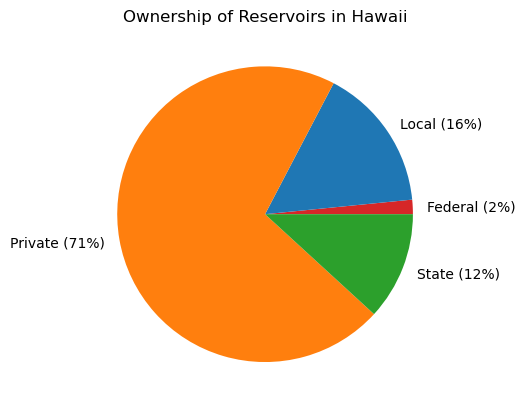

In [5]:
ownership_df = damsite_meta.groupby('Owner_Type').count()
ownership = ownership_df.index.to_list()
for i in range(len(ownership)):
    if ownership[i] == 'P':
        ownership[i] = 'Private'
    if ownership[i] == 'L':
        ownership[i] = 'Local'
    if ownership[i] == 'F':
        ownership[i] = 'Federal'
    if ownership[i] == 'S':
        ownership[i] = 'State'
    
ownership_count = ownership_df.state_id.to_list()

total = sum(ownership_count)

plt.pie(ownership_count, labels = [ownership[0] + ' (' + str(round((ownership_count[0]/total)*100)) + '%' + ')', ownership[1]+ ' (' + str(round((ownership_count[1]/total)*100))  + '%' + ')', ownership[2] + ' (' + str(round((ownership_count[2]/total)*100))  + '%' + ')', ownership[3] + ' (' + str(round((ownership_count[3]/total)*100))  + '%' + ')'], colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'])
plt.title('Ownership of Reservoirs in Hawaii')

plt.savefig(os.path.join(figures_path, 'Reservoir_Ownership.png'))

## Box and whiskers of random reservoir data relevant to report

In [6]:
#data for plots

Reservoir_metrics = {}
Reservoir_metrics['Surface Area\n(Acres)'] = damsite_meta.surface_area.to_list()
Reservoir_metrics['Maximum Storage\n(Million Gallons)'] = [round(i * 0.32585143188913, 1) for i in damsite_meta.maximum_storage.to_list()]
Reservoir_metrics['Dam Height\n(ft)'] = damsite_meta.dam_height.to_list()
Reservoir_metrics['Drainage Basin Area\n(sq mi)'] = damsite_meta.drainage_area.to_list() #sq mi
Reservoir_metrics['Population at Risk\n(# of Citizens)'] = damsite_meta.population_at_risk.to_list() #number of people



AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

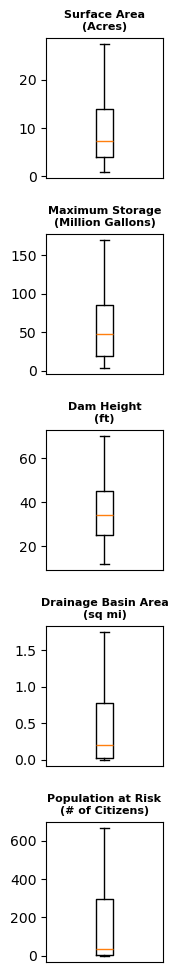

In [7]:
fig, ax = plt.subplots(5, 1, figsize=(1.5, 12), gridspec_kw={'hspace': 0.4}) 
metrics = list(Reservoir_metrics.keys())
for i in range(5):
    data_name = metrics[i]
    data = Reservoir_metrics[data_name]
    
    no_nan_data = [item for item in data if not(math.isnan(item)) == True]
    ax[i].boxplot(no_nan_data, showfliers=False)
    ax[i].set_title(data_name, fontweight  = 'bold', fontsize = 8)
    ax[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

ax.savefig(os.path.join(figures_path, 'Reservoir_Important_Metrics.png'))